In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

In [5]:
#Loading the California Housing Dataset
california=fetch_california_housing()

#Converting it into a pandas dataframe
data=pd.DataFrame(california.data, columns=california.feature_names)

#Adding a target to the Dataframe
data['Price']=california.target

#Printing first 5 rows of the dataset
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Exploratory Data Analysis

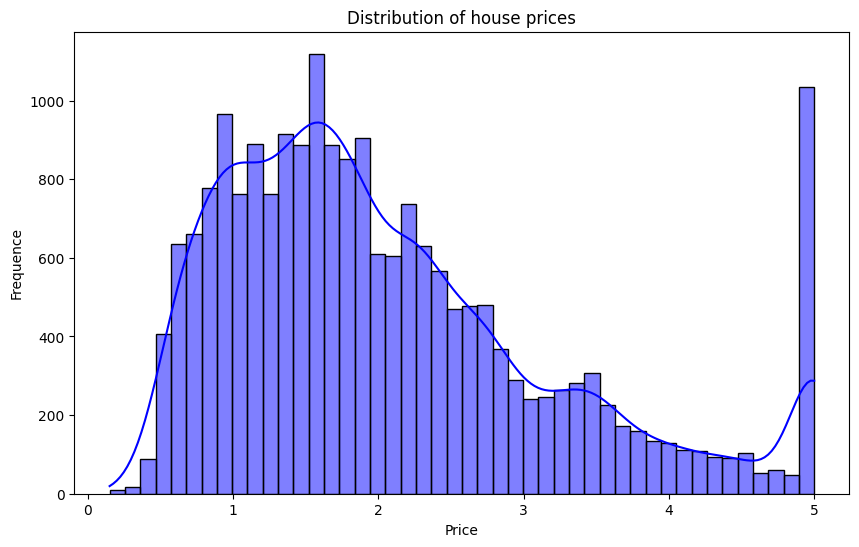

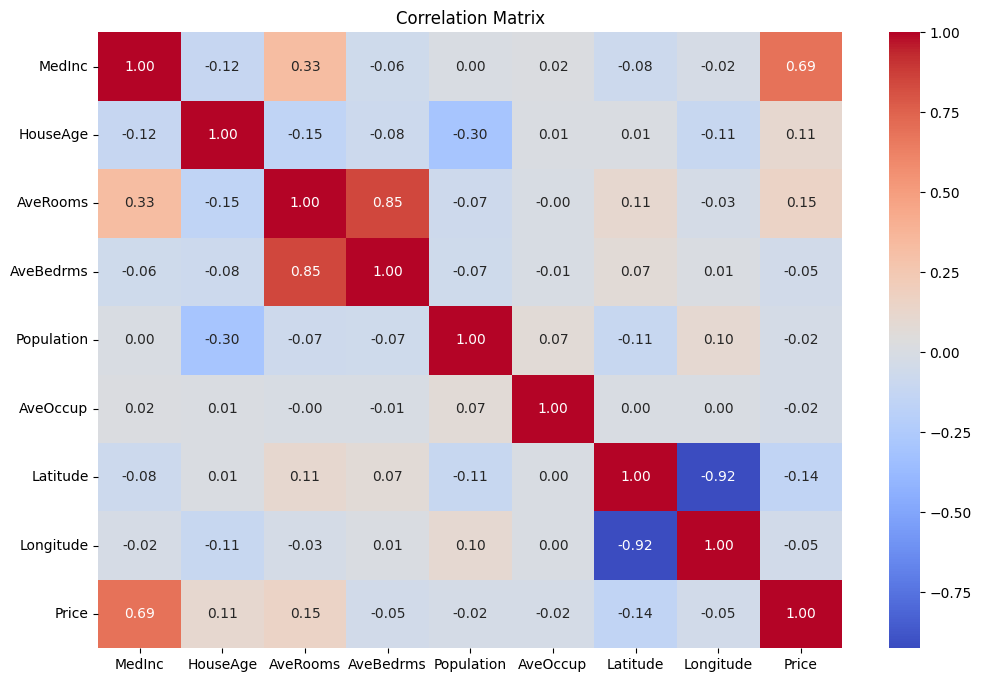

In [11]:
#Visualizing the distribution trends of housing prices

plt.figure(figsize=(10,6))
sns.histplot(data['Price'], kde=True, color='blue')
plt.title("Distribution of house prices")
plt.xlabel("Price")
plt.ylabel("Frequence")
plt.show()

#Visualizing the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Data Preprocessing

In [12]:
#Checking for missing values
print(data.isnull().sum())

#Splitting the data into feature (X) and target (Y)
X=data.drop('Price',axis=1)
y=data['Price']

#Normalizing the data into StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

#Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64


Building and Training the Model

In [13]:
#Initializing the model
model=LinearRegression()

#Training the model
model.fit(X_train,y_train)

#Making predictions on the test set
y_pred=model.predict(X_test)

Evaluating the Model

In [14]:
#Calculating the evaluation metrics
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

#Results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 0.5332001304956566
Mean Squared Error: 0.5558915986952444
R2 Score: 0.5757877060324508


Visualizing the Results

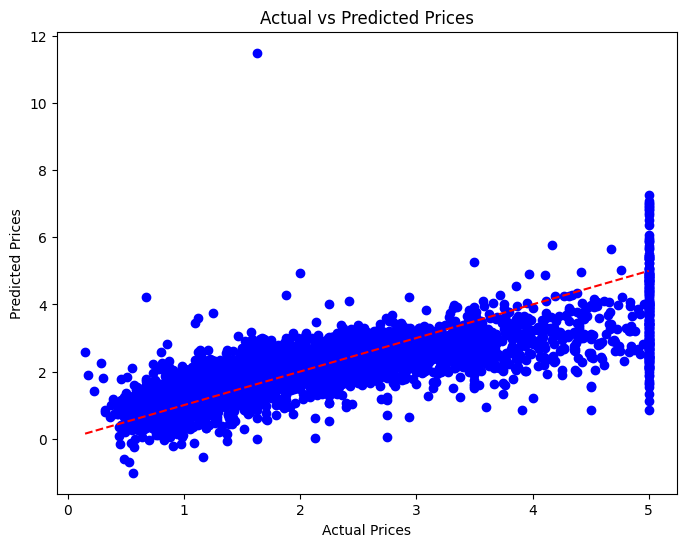

In [16]:
#Plotting actual vs predicted figures
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test),max(y_test)],[min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()